### Validation of TandemMod on known modified sites

In [2]:
#ACTB site 1217

WT="/home/wuyou/Projects/human_HEK293T_nanopore/data/results/ACTB_WT.predict"
KO="/home/wuyou/Projects/human_HEK293T_nanopore/data/results/ACTB_KO.predict"

WT_count=[0,0]
with open(WT) as f:
    for line in f:
        site=line.split("\t")[1]
        probabbility=float(line.split("\t")[5])
        if site == "1217":
            WT_count[1]+=1
            if probabbility>0.95:
                WT_count[0]+=1

KO_count=[0,0]
with open(KO) as f:
    for line in f:
        site=line.split("\t")[1]
        probabbility=float(line.split("\t")[5])
        if site == "1217":
            KO_count[1]+=1
            if probabbility>0.95:
                KO_count[0]+=1

print("WT mod ratio:",WT_count[0]/WT_count[1])
print("KO mod ratio:",KO_count[0]/KO_count[1])

WT mod ratio: 0.5076495132127955
KO mod ratio: 0.07692307692307693


In [4]:
#BSG site 1340

WT="/home/wuyou/Projects/human_HEK293T_nanopore/data/results/BSG_WT.predict"
KO="/home/wuyou/Projects/human_HEK293T_nanopore/data/results/BSG_KO.predict"

WT_count=[0,0]
with open(WT) as f:
    for line in f:
        site=line.split("\t")[1]
        probabbility=float(line.split("\t")[5])
        if site == "1340":
            WT_count[1]+=1
            if probabbility>0.95:
                WT_count[0]+=1

KO_count=[0,0]
with open(KO) as f:
    for line in f:
        site=line.split("\t")[1]
        probabbility=float(line.split("\t")[5])
        if site == "1340":
            KO_count[1]+=1
            if probabbility>0.95:
                KO_count[0]+=1

print("WT mod ratio:",WT_count[0]/WT_count[1])
print("KO mod ratio:",KO_count[0]/KO_count[1])

WT mod ratio: 0.7307692307692307
KO mod ratio: 0.15760869565217392


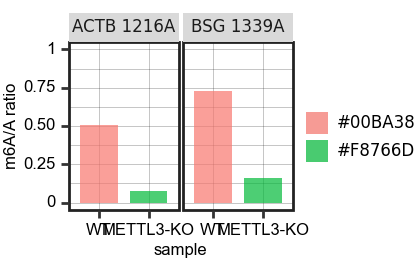

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 2.1 x 1.33 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/figure_5g_m6A_modification_ratio_in_ACTB_and_BSG.pdf
findfont: Font family ['Arial'] not found. Falling back to Helvetica.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


In [6]:
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd
import numpy as np

black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"

import re

sample=["WT","METTL3-KO","WT","METTL3-KO"]

m6A_A_ratio=[0.508,0.077,0.731,0.158]

site=["ACTB 1216A","ACTB 1216A","BSG 1339A","BSG 1339A"]

color=[c2,c1,c2,c1]

plt.rcParams["pdf.use14corefonts"] = True

data=pd.DataFrame({"sample":sample,"m6A/A ratio":m6A_A_ratio,"site":site,"color":color})
#data=data.sort_values(by=['m6A/A ratio'],ascending=False)        #sort
data['sample'] = pd.Categorical(data['sample'], categories=pd.unique(data['sample']))  #reorder legend

p=(
    ggplot()
    +geom_bar(data,aes(x="sample",y="m6A/A ratio",width=0.75,fill="color"),alpha=0.7,stat="identity")   
    
    #+scale_x_continuous(breaks = [0,100,200,300],labels =["               5'UTR", "                CDS", "                3'UTR",""])
    +theme(panel_background=element_rect(fill=gray, alpha=0),
            strip_text_x = element_text(size = 6),            #facet font size
            #legend_position = "none",
            panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
            panel_border=element_rect(color=black, size=1),
            #axis_text_x=element_text(size=6,family="Monospace",color="black",angle=45),
            axis_text_x=element_text(size=6,family="Arial",color="black",angle=0),
            axis_text_y=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
             
            figure_size=[2.1,1.33],
            legend_title = element_text(size=6,alpha=0), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            legend_position=None,
            #legend_position=(0.70,0.75), 
            legend_key_size=8) #change legend text font size)
            
    #+ geom_vline(xintercept=100,linetype="dashed",alpha=0.5)
    #+ geom_vline(xintercept=200,linetype="dashed",alpha=0.5)
    +ylim([0,1])
    #+xlim([0,0.20])
    +facet_wrap("site")
    +scale_fill_manual(values=[c1, c2, c3]) 
    
)

print(p)
p.save('figure/figure_5g_m6A_modification_ratio_in_ACTB_and_BSG.pdf')